In [9]:
from PIL import Image
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt
import os,glob
import numpy as np
import cv2
%matplotlib inline

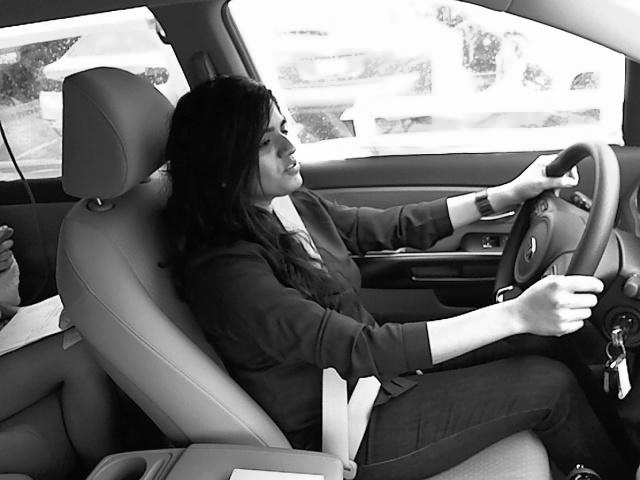

In [10]:
img = Image.open('./imgs/train/c0/img_23910.jpg') # uses the Image module (PIL)
#plt.imshow(face, cmap=plt.cm.gray, vmin=30, vmax=200)
img = img.convert('L')
img

In [70]:
# Load image from the path : 
def get_im(path):
    # Load as grayscale
    img = cv2.imread(path, 0)
    # Reduce size
    resized = cv2.resize(img, (128, 96))
    return resized


# Load train data : 
def load_train():
    X_train = []
    y_train = []
    print('Read train images')
    for j in range(10):
        print('Load folder c{}'.format(j))
        path = os.path.join('.', 'imgs', 'train', 'c' + str(j), '*.jpg')
        files = glob.glob(path)
        for fl in files:
            img = get_im(fl)
            X_train.append(img)
            y_train.append(j)

    return X_train, y_train


# Takes in an (m, n) numpy array and flattens it into an array of shape (1, m * n)
def flatten_image(img):
    s = img.shape[0] * img.shape[1]
    img_wide = img.reshape(1, s)
    return img_wide[0]


# Victorize Image (From 2D-Array to Simple Array)
def victorize_data(images): 
    data = []
    for image in images:
        img = flatten_image(image)
        data.append(img)

    data = np.array(data)
    return data

In [12]:
data = load_train()

Read train images
Load folder c0
Load folder c1
Load folder c2
Load folder c3
Load folder c4
Load folder c5
Load folder c6
Load folder c7
Load folder c8
Load folder c9


In [23]:
x_train = data[0]
y_train = data[1]

In [28]:
#im = Image.fromarray(x_train[0]) Show image from nparray

In [77]:
vic_train = victorize_data(x_train)